# 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
from PIL import Image
from IPython.display import display

In [3]:
loan = Image.open('loan.JPEG')
loan1 = Image.open('loan_d.PNG')
# img_resized = laon.resize((200, 200))


In [4]:
df = pd.read_csv("loan1.csv")
df.head()

,age,gender,income,credit_score,loan_status
0,32,Male,85000,720,Approved
1,45,Female,62000,680,Approved
2,28,Male,25000,590,Denied
3,51,Female,105000,780,Approved
4,36,Male,75000,710,Approved


# The LabelEncoder is a utility class provided by the sklearn.preprocessing module in the scikit-learn library. It is used to convert categorical data (labels) into numerical form.

In [5]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder assigns a unique integer to each unique category in a categorical column.

In [6]:
le_gender = LabelEncoder()
# le_occupation = LabelEncoder()
# le_education_level = LabelEncoder()
# le_marital_status = LabelEncoder()
le_loan_status = LabelEncoder()

In [7]:
df['gender'] = le_gender.fit_transform(df['gender'])
# df['occupation'] = le_occupation.fit_transform(df['occupation'])
# df['education_level'] = le_education_level.fit_transform(df['education_level'])
# df['marital_status'] = le_marital_status.fit_transform(df['marital_status'])
df['loan_status'] = le_loan_status.fit_transform(df['loan_status'])

In [8]:
df

,age,gender,income,credit_score,loan_status
0,32,1,85000,720,0
1,45,0,62000,680,0
2,28,1,25000,590,1
3,51,0,105000,780,0
4,36,1,75000,710,0
...,...,...,...,...,...
56,39,1,100000,770,0
57,25,0,32000,570,1
58,43,1,95000,760,0
59,30,0,55000,650,0


# input Features: When you have categorical features that you want to convert to numerical form

In [9]:
input = df.drop('loan_status',axis = 'columns')
input

# input = df[['age','gender','occupation','education_level','marital_status','income','credit_score']]



,age,gender,income,credit_score
0,32,1,85000,720
1,45,0,62000,680
2,28,1,25000,590
3,51,0,105000,780
4,36,1,75000,710
...,...,...,...,...
56,39,1,100000,770
57,25,0,32000,570
58,43,1,95000,760
59,30,0,55000,650


# Target Variable: When the target variable (the value you want to predict) is categorical.

In [10]:
target = df['loan_status']
target

0     0
1     0
2     1
3     0
4     0
     ..
56    0
57    1
58    0
59    0
60    0
Name: loan_status, Length: 61, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(input, target,  test_size = 0.2,random_state=42)

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [15]:

# age1 = int(input("enter age"))
# gender1 = int(input("enter gender"))
# occupation1  = int(input("enter occupation"))
# education_level1  = int(input("enter education_level"))
# marital_status1  = int(input("enter marital_status"))
# income1  = int(input("enter income"))
# credit_score1  = int(input("enter credit_score"))

In [19]:
                            #age	gender	occupation	education_level	marital_status	income	credit_score
# pred_Approved = model.predict([[32,0,22,1,0,89000,720]]) 

pred_Approved = model.predict([[32,0,89000,720]])

# pred_Approved = model.predict([[age,gender,occupation,education_level,marital_status,income,credit_score]]) 
print('Approved kru ya nhi:=',pred_Approved)

Approved kru ya nhi:= [0]


C:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


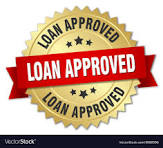

None


In [20]:
if pred_Approved == 1:
    print(display(loan1))
elif pred_Approved == 0:
    print(display(loan))
else:
    print('please try again')

In [46]:
# Alternatively, evaluate the model accuracy using accuracy_score from sklearn.metrics
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [17]:
import pickle

In [18]:
pickle.dump(model,open('model2.pkl', 'wb'))

# the actual values (y_test) and the predicted values (y_pred) into a single table for easy comparison and analysis.

# You can see where the model predictions match the actual values

In [19]:

df1 = pd.DataFrame({'predicted_Value of x_test':y_pred,'actual values of y_test':y_test,})
df1

,predicted_Value of x_test,actual values of y_test
0,0,0
5,1,1
46,0,0
31,0,0
13,0,0
55,0,0
34,1,1
49,1,1
12,1,1
40,0,0


In [20]:
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,720,0
1,45,0,35,4,1,62000,680,0
2,28,1,33,3,1,25000,590,1
3,51,0,16,1,0,105000,780,0
4,36,1,0,1,0,75000,710,0
...,...,...,...,...,...,...,...,...
56,39,1,2,4,0,100000,770,0
57,25,0,27,3,1,32000,570,1
58,43,1,4,1,0,95000,760,0
59,30,0,37,4,1,55000,650,0
